# Лабораторная работа №5
## Решение систем линейных уравнений

В системе имееться интеграл, поэтому для начала вычислим его используя рекурентную формулу Симпсона, с относительной точностью $0.01$


Многообразие квадратурных формул определяемся требованиями, предъявляемыми к алгоритмам вычисления интеграла и классом функций к
которым применяется данный алгоритм. Общая проблема построения квадратурных формул заключается в следующем. Пусть задано пространство $H_{[α,β]}$ и натуральное число n, Требуется среди всех квадратурных формул вида

$ \sum^n_{i=1} C^{(n)}_i\cdot f_i$

определить такую, чтобы величина верхней грани

$ sup_{f∈H[α,β]} | \int^b_a f(x)dx − \sum^n_{i=1} C^{(n)}_i\cdot f_i| $

являлась наименьшей.

Таким образом, речь идет о таком выборе на отрезке $[α, β]$ узлов сетки $ x_i ∈ ω_n$ и весовых коэффициентов $C^{(n)}_i$, при котором приближенное значение интеграла, даваемое квадратурной формулой, было наилучшим.


Можно видоизменить поставленную задачу, если искать в указанном
смысле квадратурную формулу, в которой либо узлы, либо весовые коэффициента подчинены заранее определенным требованиям. Наиболее просто 
поставленная задача решается для заранее определенной системы узлов и
заранее определенного класса интегрируемых функций.

Квадратурная формула Симпсона (n = 2)

$ \sum^2_{k=0} C^{(2)}_k\cdot f(x^{(2)}_k) = (β − α) / 6 \cdot (f(α) + 4f((β + α)/2) + f(β)) $

In [2]:
import numpy as np
from scipy import *
from scipy.linalg import *
from math import log, exp,sin
import matplotlib.pyplot as plt

In [3]:
def f(x):
    z=sin(x)*exp(-x)
    return z

In [4]:
t=1 # нужно для дробления шага
sn=1
S=[] # для график
T=[] # для график
while True:
    r=0
    s=0 
    a=0 # нижний предел
    h=4/t # шаг с дроблением
    while True:
        b0=a+h #двигаем b0
        c=(b0-a)/6*(f(a)+4*f((a+b0)/2)+f(b0)) # формула Симпсона
        a=a+h # двигаем а
        r=r+c # суммирование всех "трапеций"
        if abs(f(a))<0.001: # условие окончания подсчёта интеграла. Функци становится равной нулю
            break
    s=s+r # собственно саммо значение интеграла. Оно будет уточняться
    S.append(s) # для график добовляем значение s
    T.append(t) # для график добовляем значение t ( номер  итерации)
    t=t+1 # увеличиваем дробитель шага
    if abs(s-sn)<0.01: # условие выхода из сновного цикла
        break
    sn=s # запомнили предыдущие значение интеграла
print("Значение интеграла", s)
    

Значение интеграла 0.49842407835407637


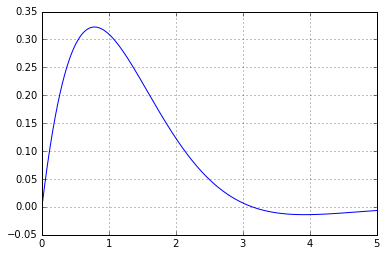

In [5]:
% matplotlib inline
xnew=np.linspace(0,5,1000)
ynew=[f(i) for i in xnew]
plt.plot(xnew,ynew)
plt.grid(True)
plt.show()

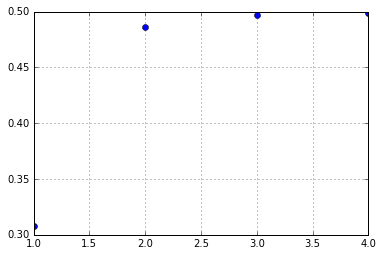

In [6]:
#График зависимости значения интеграла от номера итерации 
plt.plot(T,S,'o')
plt.grid(True)
plt.show()

In [7]:
# тот же интеграл но с помощью функции  numpy.trapz(…) 
xt=[]
yt=[]
j=0
while True:
    xt.append(j)
    yt.append(f(j))
    j=j+0.5
    if f(j)<0.001:
            break
st=np.trapz([yt],x=[xt]) 

print("Значение интеграла: ",st,"(trapz)")  

Значение интеграла:  [ 0.49930798] (trapz)


In [8]:
def f(x):
    z=sin(x)*exp(-x*(i+1))
    return z

# посчёт 10 первых интегралов с помощью формулы Симпсона
t=1 # нужно для дробления шага
sn=1
S=[] # для график
I=[] # для график
for i in range(10): # для подсчёта 10  первых интегралов 
    while True:
        r=0
        s=0 
        a=0 # нижний предел
        h=4/t # шаг с дроблением
        while True:
            b0=a+h #двигаем b0
            c=(b0-a)/6*(f(a)+4*f((a+b0)/2)+f(b0)) # формула Симпсона
            a=a+h # двигаем а
            r=r+c # суммирование всех "трапеций"
            if abs(f(a))<0.001: # условие окончания подсчёта интеграла. Функци становится равной нулю
                break
        s=s+r # собственно саммо значение интеграла. Оно будет уточняться
        t=t+1 # увеличиваем дробитель шага
        if abs(s-sn)<0.01: # условие выхода из сновного цикла
            break
        sn=s # запомнили предыдущие значение интеграла
    S.append(s) # для график добовляем значение s
    I.append(i) # для график добовляем значение i ( номер  интеграла)

In [9]:
#значения интегралов по trapz
St=[] # для график
It=[] # для график
for i in range(10):
    xt=[]
    yt=[]
    j=0
    while True:
        xt.append(j)
        yt.append(f(j))
        j=j+0.5
        if f(j)<0.001:
            break
    st=np.trapz([yt],x=[xt])
    St.append(st) # для график добовляем значение s
    It.append(i) # для график добовляем значение i ( номер  интеграла)

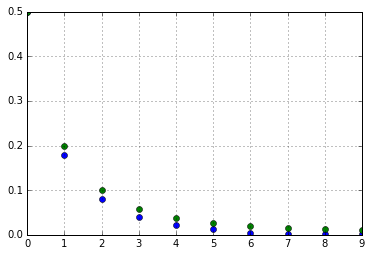

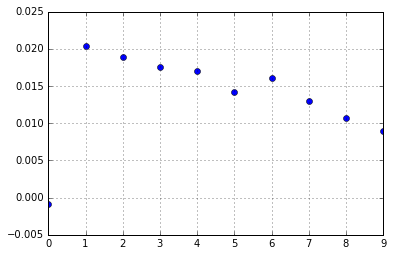

In [10]:
plt.plot(It,St,'o', I,S, 'o')
plt.grid(True)
plt.show()
St=np.array(St)
S=np.array(S)
ds=np.array((S-transpose(St)))
#график разносити
plt.plot(I,ds[0],'o')
plt.grid(True)
plt.show()

In [11]:
def f(x):
    z=sin(x)*exp(-x*(i+1))
    return z

Вычислим все интегралы в системе

In [28]:
np.set_printoptions( threshold=100,edgeitems=5)
n=1000
sn=1
b=np.zeros((n, 1))
for i in range(n): # для подсчёта n  интегралов 
    while True:
        r=0
        s=0 
        a=0 # нижний предел
        h=4/t # шаг с дроблением
        while True:
            b0=a+h #двигаем b0
            c=(b0-a)/6*(f(a)+4*f((a+b0)/2)+f(b0)) # формула Симпсона
            a=a+h # двигаем а
            r=r+c # суммирование всех "трапеций"
            if abs(f(a))<0.001: # условие окончания подсчёта интеграла. Функци становится равной нулю
                break
        s=s+r # собственно саммо значение интеграла. Оно будет уточняться
        t=t+1 # увеличиваем дробитель шага
        if abs(s-sn)<0.01: # условие выхода из сновного цикла
            break
        sn=s # запомнили предыдущие значение интеграла
    b[i][0]=s # вектор правой части
print(b)
    

[[  5.21597000e-01]
 [  2.00250235e-01]
 [  9.97773787e-02]
 [  5.85998072e-02]
 [  3.82627483e-02]
 ..., 
 [  5.43516003e-07]
 [  5.42698885e-07]
 [  5.41883535e-07]
 [  5.41069948e-07]
 [  5.40258120e-07]]


Найдем решение системы с помощью одношагового циклического метода Зейделя


Метод является итерационным, т.е. решение системы $Ax = b$, где

$A$ - матрица коэффициентов

$A = \begin{pmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\         
\vdots & \vdots & \ddots & \vdots \\
a_{n1} & a_{n2} & \cdots & a_{nn}
\end{pmatrix}$, 

$b$ - заданный вектор правых частей уравнений

$b = \begin{pmatrix}
b_{1}  \\
b_{2}  \\         
\vdots  \\
b_{n} 
\end{pmatrix}$, 

$x$ - вектор неизвестных

$x = \begin{pmatrix}
x_{1}  \\
x_{2}  \\         
\vdots  \\
x_{n} 
\end{pmatrix}$,  

получается как предел последовательности векторов $\{x^1,x^2,...\}$  , каждый последующий элемент которой вычисляется по определенному правилу. Начальный элемент $x^1$  выбирается произвольно. Последовательность $\{x^1,x^2,...\}$  называется итерационной, а ее элементы - последовательными итерациями.
Как правило, для итерационного метода решения системы правило построения элементов итеарционной последовательности записывается в виде
$x^{k+1}=T_kx^k+H_kb$.
В методе Зейделя $H_k = (E-M)^{-1}$  , $T_k = (E-M)^{-1}N$  , где $M+N = E-A$, $M$  - нижняя треугольная матрица с нулевыми диагональными элементами, $N$ - верхняя треугольная матрица:           

$M = \begin{pmatrix}
0 & 0 & \cdots & 0 \\
-a_{21} & 0 & \cdots & 0 \\         
\vdots & \vdots & \ddots & \vdots \\
-a_{n1}  & \cdots & -a_{nn-1} & 0
\end{pmatrix}$,

$N = \begin{pmatrix}
1-a_{11} & -a_{12} & \cdots & -a_{1n} \\
0 & 1-a_{22} & \cdots & -a_{2n} \\         
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & 1-a_{nn}
\end{pmatrix}$,

$*$Условие сходимости метода Зейделя: $||T||<1$

Следовательно соответствуя итерационному методу решение имеет вид 
$x^{k+1}=(E-M)^{-1}\cdot N\cdot x^k + (E-M)^{-1}\cdot b$

In [29]:
E=np.eye(n)
A=np.zeros((n,n))
for i in range(0,n):
    for j in range(0,n):
        A[i][j]=-1/(1+(i+1)**2)*(j+1)*sin(j+1)      
A=A+E*n**2   
L=np.zeros((n, n))
for i in range(n):
    for j in range(i):
        L[i][j]=A[i][j]       
M=-L
N=E-(A-L)  
X0=np.zeros((n, 1))
C=inv(E-M)
Cb=dot(C,b)
B=dot(C,N)

while i<1000:
    Xn=dot(B,X0)+Cb
    #if norm(X0-Xn)<0.01:
    #    break
    X0=Xn
    i+=1
    
#print( "Решени через solve")   
print(X0)



[[  5.21597000e-01]
 [  2.88031983e-01]
 [  1.96049601e-01]
 [  1.20112854e-01]
 [  6.44979391e-02]
 ..., 
 [  1.01844319e-06]
 [  1.01655661e-06]
 [  1.01387838e-06]
 [  1.01125299e-06]
 [  1.00947453e-06]]


In [30]:
R=solve(A,b)
print( "Решени через solve")   
print(R)


Решени через solve
[[  5.21597295e-07]
 [  2.00250353e-07]
 [  9.97774379e-08]
 [  5.85998420e-08]
 [  3.82627711e-08]
 ..., 
 [  5.43516599e-13]
 [  5.42699479e-13]
 [  5.41884128e-13]
 [  5.41070540e-13]
 [  5.40258711e-13]]


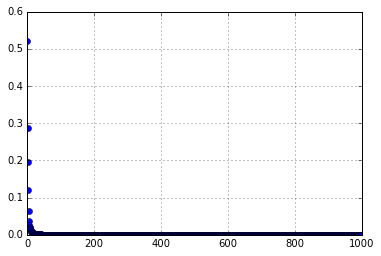

In [33]:
O=[]
for i in range (1000):
    O.append(X0[i]-R[i])
#print (O)
plt.plot(O,'o')
plt.grid(True)
plt.show()